In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/books

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/books


In [3]:
!pip install tashaphyne
!pip install pyarabic

     |████████████████████████████████| 245kB 35.6MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.6-cp36-none-any.whl size=106210 sha256=191a904caafdc115bc845239cbb9b8f8be69a59e290f377ced199c82aa036a14
  Stored in directory: /root/.cache/pip/wheels/34/b5/2d/668d567e8c2b6f10309dbfaba5bfef6ea0b1c0f9f6fb37078f
Successfully built pyarabic


In [4]:
!ls

26final		arabic_const.py  M300-10-10Tok	M300-SupsTok   preText.py
all_csv.csv	dialect26	 M300-10Enc	models	       __pycache__
alldata		finaldata4	 M300-10.h5	mymodel        s2s.h5
alldatafromgit	JORUNI.txt	 M300-10Tok	mymodel2.h5    textdata
all-trans.h5	M300-10-10Enc	 M300-SupsEnc	mymodel.h5
all-transTok	M300-10-10.h5	 M300-Sups.h5	Naftawayh-0.1


In [0]:
from preText import Text_clean,saveFile
import os


# READ AND CLEAN

In [0]:
# d='textdata/{}'
# for file in os.listdir("textdata/JOR"):
#     if file.endswith(".txt"):
#         print(os.path.join("textdata", file))

In [0]:
def read_file(D):
  f=open(D,'r',encoding='utf-8').read()
  return f.split(' ')

In [7]:
finaldatadir='finaldata4/'
dic='textdata/'
savedir='alldata/'
for files in os.listdir(dic):
  if files !='TUN':
    print(files)
    for txtfile in os.listdir(dic + files):
        if txtfile.endswith(".txt"):
          D = os.path.join(dic + '/' + files , txtfile)
          l = saveFile.read_file(D)
          #print(l[:10])
          words = Text_clean.CleanThewordsList(l)
          saveFile.to_text(words,'{}{}.txt'.format(finaldatadir,str(files)))
          #print('saved = ' , str(D))

SA
EG
AR


KeyboardInterrupt: ignored

In [0]:

# data_dict={}
# for f in os.listdir('finalData/'):
#   _l=saveFile.to_list('finalData/{}'.format(f))
#   data_dict[f.split('.')[0]]=_l

# all_data=[]
# for i in data_dict.keys():
#   all_data = all_data + data_dict[i]
# print(len(all_data))
# uniqeset=list(set(all_data))
# print(len(uniqeset))

In [0]:
# from collections import Counter 
  
# def most_frequent(List): 
#     occurence_count = Counter(List) 
#     return occurence_count.most_common(20)
# #most_frequent(all_data)

# READ,SET (X ,Y)

In [0]:
finaldatadir='finaldata4/'


seq_len=5
x_=[]
y_=[]
for f in os.listdir(finaldatadir):
  _l=saveFile.to_list('{}{}'.format(finaldatadir,f))
  for i in range(seq_len,len(_l),seq_len):
    x_.append(_l[i-seq_len:i])
    y_.append(f.split('.')[0])


In [0]:
import random
import numpy as np
import os

In [0]:
# finaldatadir='26final/'

finaldatadir='finaldata4/'


seq_len=8
min_len=4
x_=[]
y_=[]
for f in os.listdir(finaldatadir):
  _l=saveFile.to_list('{}{}'.format(finaldatadir,f))
  for i in range(0,len(_l)-seq_len):
    r=random.randint(min_len,seq_len)
    x_.append(_l[i:i+r])
    y_.append(f.split('.')[0])


In [21]:
x_[200]

['طابق', 'لبست', 'نسا', 'سامحنى', 'سيدى']

In [22]:
import keras
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_)

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
sequences = tokenizer.texts_to_sequences(x_)

In [26]:
sequences[0]

[28350, 11, 56, 11, 1542, 2184, 72452]

In [0]:
sequences = pad_sequences(sequences, maxlen=seq_len)

In [28]:
sequences[0]

array([    0, 28350,    11,    56,    11,  1542,  2184, 72452],
      dtype=int32)

In [29]:
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size

110191

In [0]:
import numpy as np

In [0]:
X = np.array(sequences)

In [0]:
 from sklearn.preprocessing import LabelBinarizer
 encoder = LabelBinarizer()
 Y = encoder.fit_transform(y_)

In [33]:
X.shape

(687888, 8)

In [35]:
Y.shape

(687888, 5)

In [0]:
del x_
del y_

# MODEL

In [0]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,Dropout,SpatialDropout1D

In [0]:
mname='M26D-Supss'

In [0]:
class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if epoch % 20 == 0 : 
            self.model.save("models/2{}_{}.hd5".format(mname,epoch))

In [0]:
def create_model(vocabulary_size, seq_len,output_size):
    model = Sequential()
    model.add(Embedding(vocabulary_size, output_dim = 300, input_length = seq_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(128,dropout=0.2, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
             X, Y, test_size=0.05,shuffle=True)

In [46]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [48]:
model=create_model(vocabulary_size+1,seq_len,5)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 8, 300)            33057600  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 8, 300)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

In [49]:

saver = CustomSaver()
hist=model.fit(X_train, y_train, batch_size=25, epochs=20,verbose=1,validation_data=[X_test,y_test],
               callbacks=[saver])
# save the model to file


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 653493 samples, validate on 34395 samples
Epoch 1/20


332550/653493 [==============>...............] - ETA: 9:06 - loss: 0.2729 - acc: 0.9123

KeyboardInterrupt: ignored

In [0]:
from pickle import dump,load

model.save('{}.h5'.format(mname))
# save the tokenizer
dump(tokenizer, open('{}Tok'.format(mname), 'wb'))
dump(encoder, open('{}Enc'.format(mname), 'wb'))

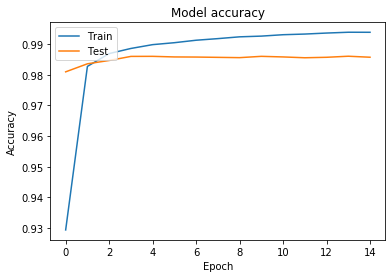

In [0]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


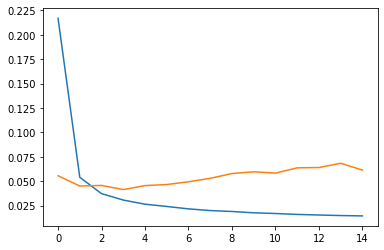

In [0]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()


# PREDICT

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/books

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/books'
/content/drive/My Drive/books


In [0]:
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [0]:
try:
  model
except NameError:
  name='model500seq'
  
  model=load_model('{}.h5'.format(name))
  tok=load(open('{}tok'.format(name),'rb'))
  encoder=load(open('{}enc'.format(name),'rb'))

In [0]:
allpre=model.predict(X_test)

In [0]:
preclass=encoder.inverse_transform(allpre)
y_true=encoder.inverse_transform(y_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_true,preclass))

              precision    recall  f1-score   support

          AR       0.99      0.99      0.99     26491
          EG       0.99      0.98      0.99      4543
         JOR       0.96      0.96      0.96      6469
          SA       0.99      0.99      0.99      9373
         TUN       1.00      0.99      0.99      4893

    accuracy                           0.99     51769
   macro avg       0.98      0.98      0.98     51769
weighted avg       0.99      0.99      0.99     51769



[[26243    16   184    44     4]
 [   36  4453    34    16     4]
 [  198    10  6230    30     1]
 [   51    11    56  9248     7]
 [   14     5     8     8  4858]]
Accuracy: 98.58%


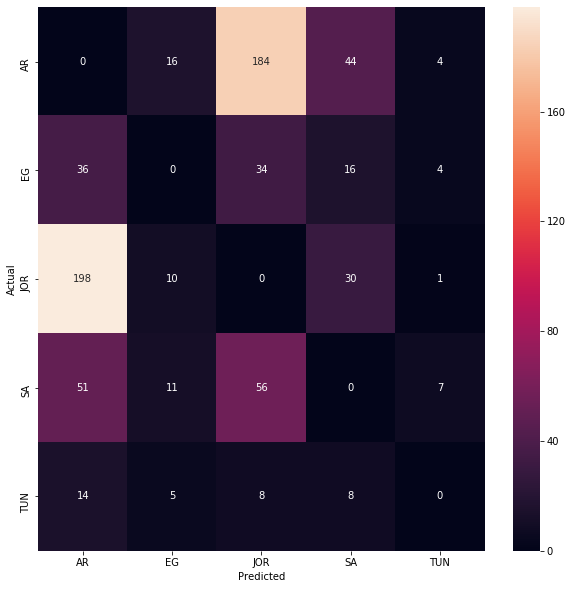

In [0]:
import pandas as pd
import seaborn as sns

matrix = confusion_matrix(y_true,preclass)
print(matrix)


scores= model.evaluate(X_test, y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


conf_mat = confusion_matrix(y_true,preclass)


row,col = np.diag_indices(conf_mat.shape[0])
conf_mat[row,col]=0


fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['AR','EG','JOR','SA','TUN'], yticklabels=['AR','EG','JOR','SA','TUN'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()